In [1]:
library(ggplot2)
library(data.table)
library(dplyr)
library(tidyr)
library(purrr) 
library(patchwork)
library(cowplot)
library(ggbreak)
library(scales)
library(extrafont)

# 3. 폰트 로드
loadfonts()


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



다음의 패키지를 부착합니다: ‘purrr’


The following object is masked from ‘package:data.table’:

    transpose



다음의 패키지를 부착합니다: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots


ggbreak v0.1.2

If you use ggbreak in published research, please cite the following
paper:

S Xu, M Chen, T Feng, L Zhan, L Zhou, G Yu. Use ggbreak to effectively
utilize plotting space to deal with large datasets and outliers.
Frontiers in Genetics. 2021, 12:774846. doi: 10.3389/fgene.2021.774846



다음의 패키지를 부착합니다: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


필요한 패키지를 로딩중입니다: extrafont

Registering fonts with R

cmex10 already registered with pdfFont().

cmmi10 alread

# Step 1. Load data

In [2]:
df <- fread(
    "/data/jerrylee/pjt/BIGFAM.v.2.0/data/simulation/obj2/simulation.varying-AX.tsv",
    sep = "\t"
)

head(df)

A_true,X_true,eta,alp,X_ridge,X_noRidge
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.6,0.001,0.8207297,2,-0.016738719,-0.018418734
0.6,0.001,0.7958731,2,-0.003061293,-0.003388033
0.6,0.001,0.8120185,2,0.040802960,0.044986588
0.6,0.001,0.7783045,2,-0.014188324,-0.015771843
0.6,0.001,0.7982959,2,-0.046255919,-0.051163095
0.6,0.001,0.7501451,2,0.037003897,0.041449698


# plot theme

In [3]:
# 공통 테마 함수 정의
get_nature_theme <- function() {
    theme_bw() +
        theme(
            # 전체적인 배경
            panel.background = element_rect(fill = NA, color = NA),
            panel.grid.major = element_blank(),
            panel.grid.minor = element_blank(),
            panel.border = element_blank(),  
            
            # 축 설정
            axis.line.x.top = element_blank(),
            axis.line.y.right = element_blank(),
            axis.line.x.bottom = element_line(color = "black", size = 0.3),  
            axis.line.y.left = element_line(color = "black", size = 0.3),    
            axis.text = element_text(size = 6.5, color = "black"),
            axis.title = element_text(size = 7.5, color = "black"),
            axis.ticks = element_line(size = 0.3),
            axis.ticks.length = unit(0.8, "mm"),
            
            # 범례 설정
            legend.margin = margin(1, 1, 1, 1, unit = "mm"),
            # legend.spacing.y = unit(0.1, "cm"),
            
            # 여백 설정
            # plot.margin = unit(c(0.1, 0.2, 0.1, 0.1), "cm")
            plot.margin = margin(0, 0, 0, 0)
        )
}

# Step 2. Plot

In [4]:
df$A_true <- as.factor(df$A_true)
df %>% sample_n(10)

A_true,X_true,eta,alp,X_ridge,X_noRidge
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.4,0.005,0.6389888,2,-0.018142152,-0.021146112
0.6,0.001,0.7931145,2,-0.034596549,-0.038314922
0.2,0.020,0.4591713,2,0.042461054,0.056076574
0.2,0.001,0.4069904,2,0.012924761,0.018200065
0.2,0.010,0.4077034,2,0.018283143,0.025719414
0.4,0.005,0.5660090,2,-0.011131122,-0.013480126
0.2,0.005,0.3870889,2,0.020706669,0.030049563
0.2,0.001,0.4132598,2,-0.015903628,-0.022199309
0.4,0.005,0.5931836,2,-0.002297255,-0.002738640


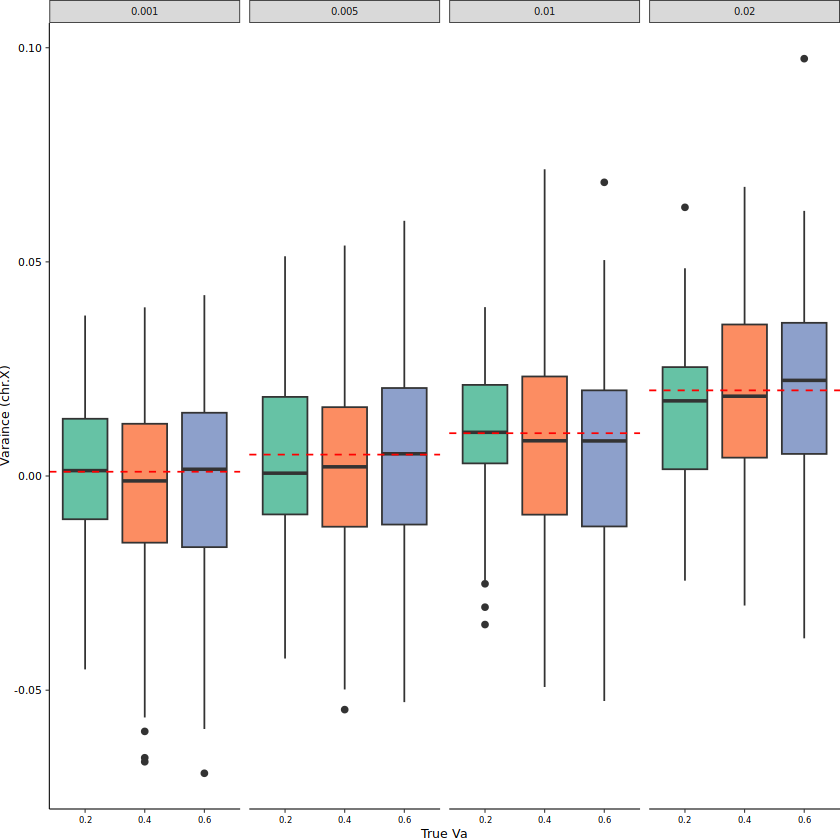

In [23]:
p <- ggplot(df, aes(x = A_true, y = X_ridge, fill = A_true)) +
  geom_boxplot() +
  geom_hline(aes(yintercept = X_true), linetype = "dashed", color = "red") +
  facet_wrap(~X_true, ncol = 4) +  # 4개의 subplot을 가로로 배치
  scale_fill_brewer(palette = "Set2") +
  get_nature_theme() +
  theme(legend.position = "none") + 
  theme(axis.text.x = element_text(size = 5),  # x축 tick 사이즈를 줄이기
        strip.text.x = element_text(size = 6)) +  # facet에 써지는 글자 크기도 줄이기
  labs(
    x = "True Va",
    y = "Varaince (chr.X)",
    fill = "Variance (autosome)"
  )

p

In [24]:
output_path <- paste0(
    "/data/jerrylee/pjt/BIGFAM.v.2.0/figures/simulation.X-varying-AX.pdf"
)

ggsave(
    filename = output_path,
    plot = p,
    width = 60,
    height = 46,
    units = "mm",
    dpi = 300,
    device = cairo_pdf
)
